In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/main/dataset-penugasan/AUC.csv")
df.head()


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [4]:
df.isnull().sum()

,0
name,0
author,0
narrator,0
time,0
releasedate,0
language,0
stars,0
price,0


In [5]:
df.shape[0]

87489

In [6]:
df.dtypes

,0
name,object
author,object
narrator,object
time,object
releasedate,object
language,object
stars,object
price,object


In [7]:
duplicates = df[df.duplicated()]
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")
print("Data duplikat:")
print(duplicates)

Jumlah data duplikat: 0
Data duplikat:
Empty DataFrame
Columns: [name, author, narrator, time, releasedate, language, stars, price]
Index: []


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [10]:
# Encoding categorical columns to numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.Categorical(df[col]).codes

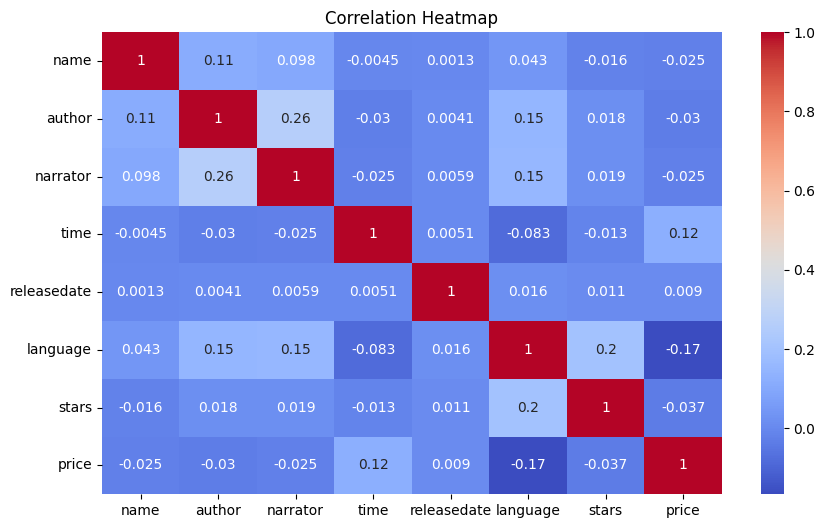

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Feature selection and target variable
# Asumsikan bahwa 'price' adalah target dan fitur lainnya digunakan untuk prediksi
X = df.drop(columns=['price'])
y = df['price']

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Model evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [19]:
print("\nModel Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")



Model Evaluation:
RMSE: 237.87
R^2 Score: 0.22


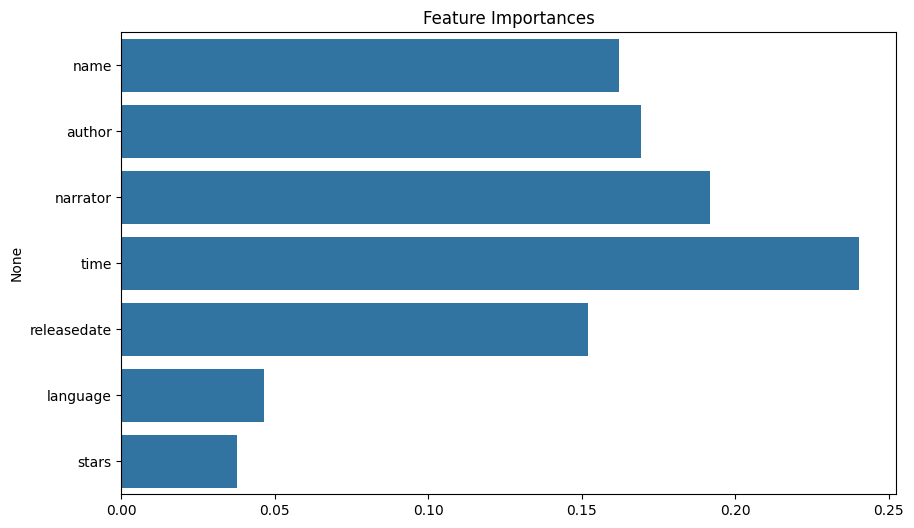

In [20]:
# Feature importance visualization
plt.figure(figsize=(10, 6))
importance = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importances")
plt.show()